In [12]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv("CCGENERAL.csv")

In [14]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [17]:
df["PAYMENTS"].fillna(df["PAYMENTS"].mean(),inplace=True)

In [18]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)

In [22]:
data=df[["BALANCE_FREQUENCY","BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY"
         ,"ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX",
         "PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS"]]

In [23]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage='complete')
clust_labels=model.fit_predict(data)

In [24]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


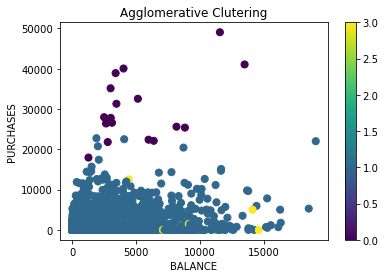

In [36]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data["BALANCE"] ,data["PURCHASES"] ,c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

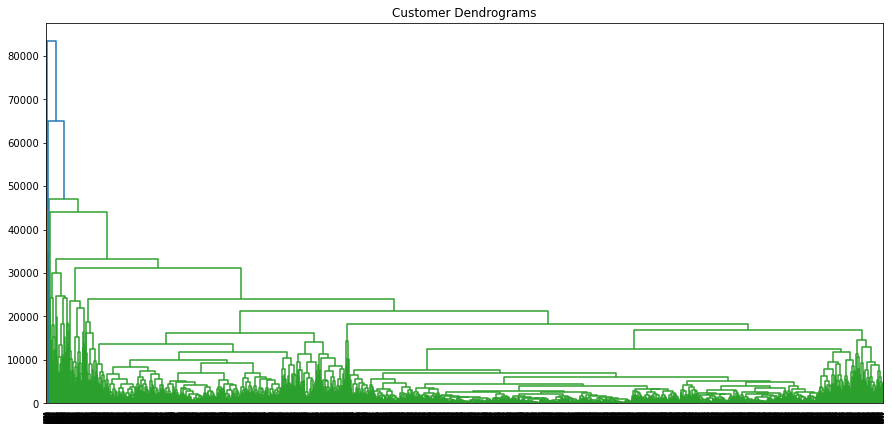

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [27]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [28]:
label=pd.DataFrame(kmeans.labels_)
kmeans.predict(data)
print(kmeans.cluster_centers_)
print(label)

[[9.09668973e-01 1.74507301e+03 1.32934749e+03 8.13841004e+02
  5.15911135e+02 9.98126791e+02 5.64255108e-01 3.10317269e-01
  3.95155495e-01 1.34285699e-01 3.26015936e+00 1.97792829e+01
  6.38117651e+03 2.00442834e+03]
 [9.19413205e-01 4.16415393e+03 4.05268219e+03 2.52666575e+03
  1.52609178e+03 6.04129962e+03 5.61294318e-01 3.77783079e-01
  4.32677322e-01 3.40758716e-01 1.25376712e+01 4.52910959e+01
  9.58511831e+03 1.15897916e+04]
 [8.48537333e-01 7.77161309e+02 4.77802621e+02 2.27473917e+02
  2.50627028e+02 4.57916525e+02 4.46286467e-01 1.23131503e-01
  3.45139160e-01 1.08129214e-01 2.24853856e+00 9.11201207e+00
  2.14670281e+03 8.38721601e+02]
 [9.46468737e-01 5.06086377e+03 1.54715935e+03 9.62780146e+02
  5.84460755e+02 2.46772023e+03 5.11553403e-01 3.04024650e-01
  3.60486206e-01 2.41359384e-01 6.39342266e+00 2.11814860e+01
  1.17414738e+04 2.40968005e+03]
 [9.57954542e-01 5.40533094e+03 2.72763637e+04 2.18771029e+04
  5.39926083e+03 1.55037839e+03 9.09027750e-01 8.42361167e-01


In [29]:
sum_of_squared_distances=[]
K = range(1,15)
for i in K:
    km=KMeans(n_clusters=i)
    km= km.fit(data)
    sum_of_squared_distances.append(km.inertia_)

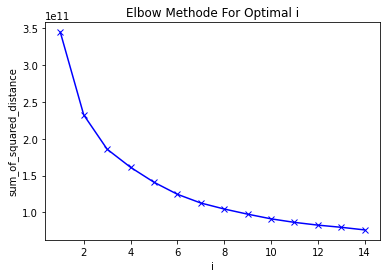

In [30]:
plt.plot(K,sum_of_squared_distances,"bx-")
plt.xlabel("i")
plt.ylabel("sum_of_squared_distance")
plt.title("Elbow Methode For Optimal i")
plt.show()

In [31]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=5,random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

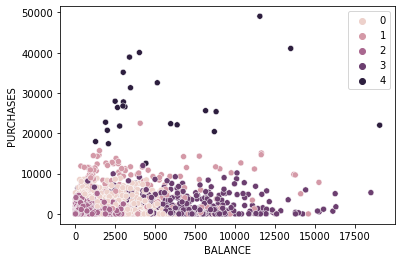

In [33]:
import seaborn as sns
sns.scatterplot(data=data,x="BALANCE",y="PURCHASES",hue=kmeans.labels_)
plt.legend()
plt.show()

In [ ]:
# nous avons les memes configuration des clusters en agglomeration comme avec kmeans